# 📌 Car Price Prediction with Machine Learning

Import required libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Load dataset

In [29]:
df = pd.read_csv(r"C:\Users\victus\OneDrive\Desktop\flower\car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Drop Car_Name (too many unique values, not useful directly)

In [30]:
df = df.drop("Car_Name", axis=1)
df

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Feature Engineering: Car Age

In [31]:
df["Car_Age"] = 2025 - df["Year"]
df = df.drop("Year", axis=1)


Encode categorical variables

In [32]:
le = LabelEncoder()
for col in ["Fuel_Type", "Selling_type", "Transmission"]:
    df[col] = le.fit_transform(df[col])

Features & Target

In [33]:
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

Train-Test Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize models

In [35]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

Train & Evaluate

In [36]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n📌 {name}")
    print("R² Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


📌 Linear Regression
R² Score: 0.8466902419663827
MAE: 1.2219323621753853
RMSE: 1.8792498207978199

📌 Decision Tree
R² Score: 0.9105747764608487
MAE: 0.8483606557377049
RMSE: 1.4352568742500302

📌 Random Forest
R² Score: 0.9592683769360726
MAE: 0.6389196721311476
RMSE: 0.9686468632776881


# 🔥 Visualization: Feature Importance (Random Forest)

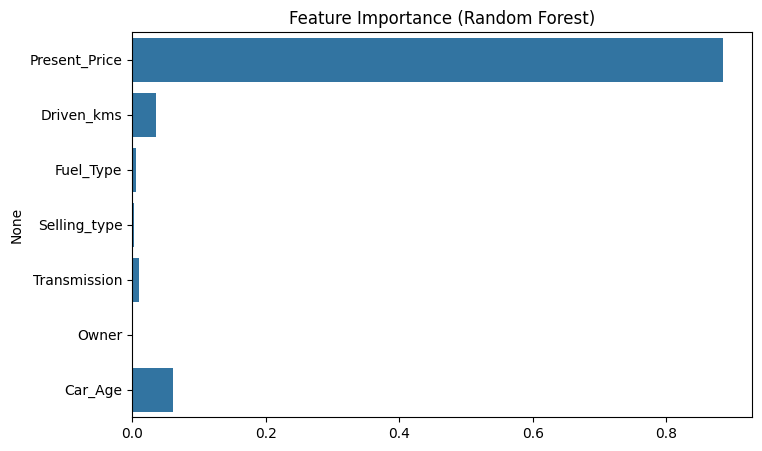

In [37]:
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()